## Support sur les réseaux de neurones

## Utilisation de Jupyter Notebook

Le principe est simple : 
 - Chaque notebook est constitué d’une liste de **cellules**
 - Chacune peut contenir du **texte formaté** ou du **code** (Python, dans notre cas)
 - On **exécute** une cellule de code -> le résultat s’affiche sous la cellule

Cliquez sur le menu **Help** > **User Interface Tour** pour un tour rapide de l’interface.    

Pour vous entraîner :
- **Insérez** quelques cellules de code au début du notebook
- Exécutez quelques commandes Python, telles que **print("Hello world!")** :
    - Cliquez dans une cellule de code et saisissez le code à exécuter
    - Exécutez le code de la cellule en tapant Shift-Entrée ou en cliquant sur le bouton d’exécution
    
Lorsque vous **cliquez** à l’intérieur d’une cellule, vous passez en mode **édition** (la cellule est alors encadrée en *vert*). Lorsque vous tapez la **touche Echap** (Esc) ou que vous cliquez juste à gauche de la cellule, vous passez en mode **commande** (la cellule est alors encadrée en *bleu*). 

Lorsque vous êtes en **mode commande**, tapez la **touche H** pour afficher les nombreux **raccourcis clavier** disponibles

## Préparation

Tout d'abord, assurons-nous que ce bloc-notes fonctionne bien en python 3, importons quelques modules communs, assurons-nous que MatplotLib trace des figures :

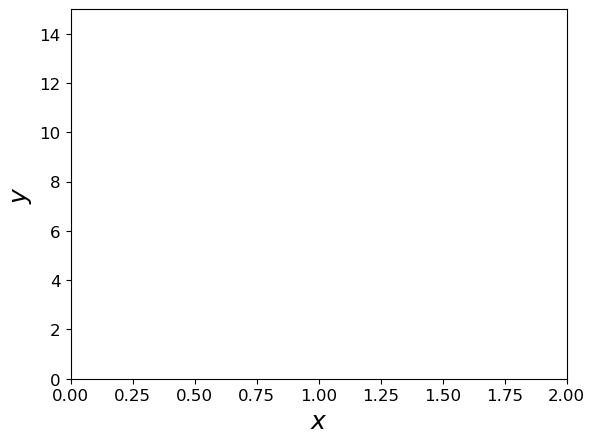

In [39]:
# Pour soutenir à la fois python 2 et python 3
from __future__ import division, print_function, unicode_literals

# Importations communes
import numpy as np
import os

# Pour que la production soit stable d'un bout à l'autre
np.random.seed(42)

# Pour tracer de jolis figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=90, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## Exemple 1 : Comprendre un perceptron

### Utilisation de l'exemple avec les cookies

In [40]:
# Lecture du fichier avec les données récupérées par les cookies
arr=np.loadtxt('../TP1/cookies1.csv', delimiter=',')
X=arr
# Nombre d'utilisateur
m=np.size(arr,0)
# Nombre de données récupérées par utilisateur
n=np.size(arr,1)
# Lecture du fichier pour savoir si les utilisateur on procédé à un achat (1 : oui, 0 : non)
arr=np.loadtxt('../TP1/cookies2.csv', delimiter=',')
y=arr.reshape(m,1)
y=y[:,0]

Dans le schéma ci-dessous :
    ![](https://miro.medium.com/max/2870/1*n6sJ4yZQzwKL9wnF5wnVNg.png)
- **X** représente les données en entrée
- **y** représente la sortie

Comme d'habitude, il y a 2 étapes :
1. L'**entraînement** dont l'objectif est de calculer les poids $w_0, w_1, ... w_n$
2. L'**utilisation** du modèle afin de prédire la sortie y pour un x donné

### Entraînement

La première étape est de diviser les données entre 
- données d'entraînement
- données de validation

In [41]:
X.shape

(500, 100)

In [42]:
X_train=X[:450,:];
X_train.shape

(450, 100)

In [43]:
X_valid=X[450:,:];
X_valid.shape

(50, 100)

In [44]:
y.shape

(500,)

In [45]:
y_train=y[:450];
y_train.shape

(450,)

In [46]:
y_valid=y[450:];
y_valid.shape

(50,)

Maintenant, nous pouvons entraîner le modèle sur les 400 données

**Solution 1** : avec une régression logistique

In [47]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=100)
log_reg.fit(X_train, y_train)



LogisticRegression(random_state=100, solver='liblinear')

**Solution 2** : avec un perceptron

In [48]:
from sklearn.linear_model import Perceptron
percep = Perceptron(max_iter=1000, tol=1e-5, random_state=100)
percep.fit(X_train, y_train)

Perceptron(random_state=100, tol=1e-05)

### Prédiction

Chargement des données des clients potentiels

In [49]:
arr=np.loadtxt('../TP1/A.csv', delimiter=',')
A=arr.reshape(1,n)
arr=np.loadtxt('../TP1/B.csv', delimiter=',')
B=arr.reshape(1,n)
arr=np.loadtxt('../TP1/C.csv', delimiter=',')
C=arr.reshape(1,n)
arr=np.loadtxt('../TP1/D.csv', delimiter=',')
D=arr.reshape(1,n)
arr=np.loadtxt('../TP1/E.csv', delimiter=',')
E=arr.reshape(1,n)




**Solution 1** : avec une régression logistique, d'après dans la  [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [50]:
## Comment trouver une probabilité y_proba en fonction du 
##           modèle appris appliqué à x=A,B, ..., E ? 

## Une fois que la probabilité a été trouvée, comment déduire
##         la classe (client ou pas client) ?


**Solution 2** : avec un perceptron, d'après dans la  [documentation](
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)

In [51]:
## Même chose avec le percepron

## Exemple 2 : Comprendre un perceptron multicouche

On va utiliser le même exemple avec un perceptron multicouche
- = Réseau de neurones profond
- = Deep neural network
- = DNN

![](https://upload.wikimedia.org/wikipedia/commons/a/a9/Perceptron_4layers.png)

L'entraînement peut se faire en utilisant le package ```tensorFlow```

In [52]:
import tensorflow as tf
from tensorflow import keras
tf.__version__


'2.17.0'

In [53]:
from sklearn import datasets, metrics

keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(450, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy')
history = model.fit(X_train, y_train, batch_size=450, epochs=10,
                    validation_data=(X_valid, y_valid))
print(model.predict(A));
print(model.predict(B));
print(model.predict(C));
print(model.predict(D));
print(model.predict(E));

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - loss: 26.3060 - val_loss: 5.6277
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 40.5797 - val_loss: 54.8996
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 12.1773 - val_loss: 114.3843
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 21.3269 - val_loss: 135.8793
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 24.8726 - val_loss: 129.4498
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 23.4813 - val_loss: 102.5586
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 18.5155 - val_loss: 61.3395
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.4575 - val_loss: 18.9521
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 11.2799 - val_loss: 9.0220
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17.2951 - val_loss: 15.3768
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[5.510577e-14]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
[[0.481959

On peut modifier :
- la fonction d'activation ([doc](https://www.tensorflow.org/api_docs/python/tf/keras/activations))
- le nombre de couche et le nombre de neurones par couche
- le nombre d'epoch
- la taille des mini-lots

In [54]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (450, 450)             │        45,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (450, 1)               │           451 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,705 (537.91 KB)

 Trainable params: 45,901 (179.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 91,804 (358.61 KB)

In [55]:
hidden1 = model.layers[1]
print(hidden1.name)
weights, biases = hidden1.get_weights()
weights

dense_1


array([[-5.16000204e-02],
       [-6.08902052e-02],
       [ 1.11878216e-01],
       [-9.37616080e-02],
       [-6.98335748e-03],
       [ 4.88853864e-02],
       [ 4.42965217e-02],
       [-5.31870276e-02],
       [-8.56878683e-02],
       [ 3.68846171e-02],
       [ 1.81171000e-02],
       [ 1.24508049e-02],
       [ 7.57570118e-02],
       [ 7.15651810e-02],
       [ 1.10594220e-01],
       [-5.43282274e-03],
       [-5.55262677e-02],
       [-7.54628927e-02],
       [ 8.56116042e-02],
       [-9.12210941e-02],
       [-4.05822881e-02],
       [-3.97471376e-02],
       [ 7.22793564e-02],
       [-8.87092724e-02],
       [ 2.08407287e-02],
       [ 3.72536778e-02],
       [ 1.13470756e-01],
       [ 1.09214537e-01],
       [-3.53238620e-02],
       [ 8.16800669e-02],
       [-9.73411649e-02],
       [-3.62106413e-02],
       [-1.66911110e-02],
       [ 7.94314668e-02],
       [ 3.83342840e-02],
       [-5.26802391e-02],
       [-7.74589181e-02],
       [ 2.59689707e-03],
       [ 8.1

Afin de verifier le comportement de l'apprentissage, on peut étudier les **courbes d'apprentissage**

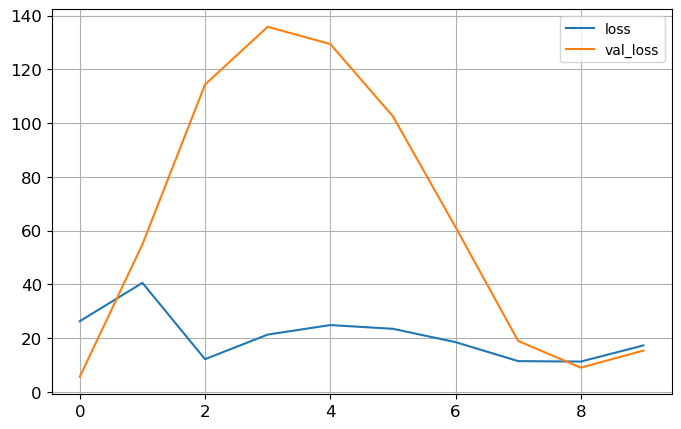

In [56]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

Changer les paramètres pour avoir un bon modèle

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - loss: 27.1124 - val_loss: 184.3602
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 33.6209 - val_loss: 257.6077
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 46.6392 - val_loss: 263.9589
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 47.5586 - val_loss: 230.7094
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 41.3439 - val_loss: 172.1580
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 30.6088 - val_loss: 96.7782
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 16.9470 - val_loss: 26.4867
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 12.0197 - val_loss: 8.1711
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 30.0320 - val_loss: 15.2451
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 17.8567 - val_loss: 44.1739


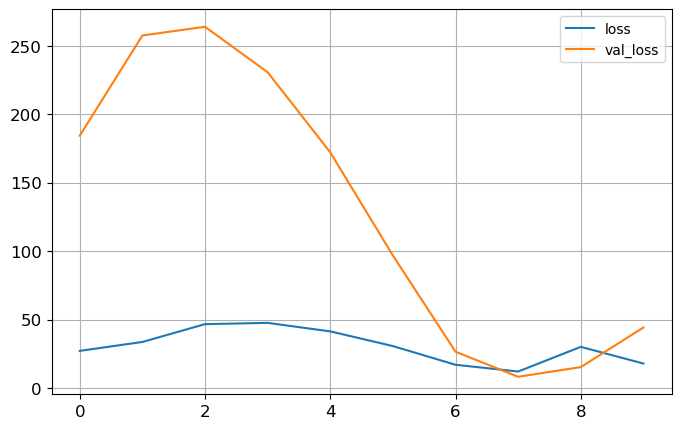

In [57]:
from sklearn import datasets, metrics

keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(450, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss='binary_crossentropy')
history = model.fit(X_train, y_train, batch_size=450, epochs=10,
                    validation_data=(X_valid, y_valid))
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

## Classificateur d'images

Import de la base de données **fashion MNIST dataset**

In [58]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Elle contient 60 000 images en niveaux de gris, de 28x28 pixels chacune :

In [59]:
X_train_full.shape

(60000, 28, 28)

Chaque intensité de pixel est représentée par un octet (0 à 255) :

In [60]:
X_train_full.dtype

dtype('uint8')

Séparons l'ensemble complet de formation en un ensemble de validation et un (plus petit) ensemble de formation. Nous réduisons également les intensités des pixels à la plage 0-1 et les convertissons en flotants, en les divisant par 255.


In [61]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Vous pouvez tracer une image en utilisant la fonction imshow() de Matplotlib, avec une carte couleur "binaire" :

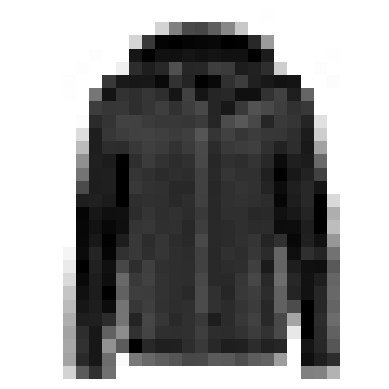

In [62]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

Les étiquettes sont les ID de classe (représentés par uint8), de 0 à 9 :

In [63]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Voici les noms des classes correspondantes :

In [64]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

La première image du kit de formation est donc un manteau (*coat*)

In [65]:
class_names[y_train[0]]

'Coat'

Le jeu de validation contient 5 000 images, et le jeu de test 10 000 images :

In [66]:
X_valid.shape

(5000, 28, 28)

In [67]:
X_test.shape

(10000, 28, 28)

Examinons un échantillon des images de l'ensemble de données :

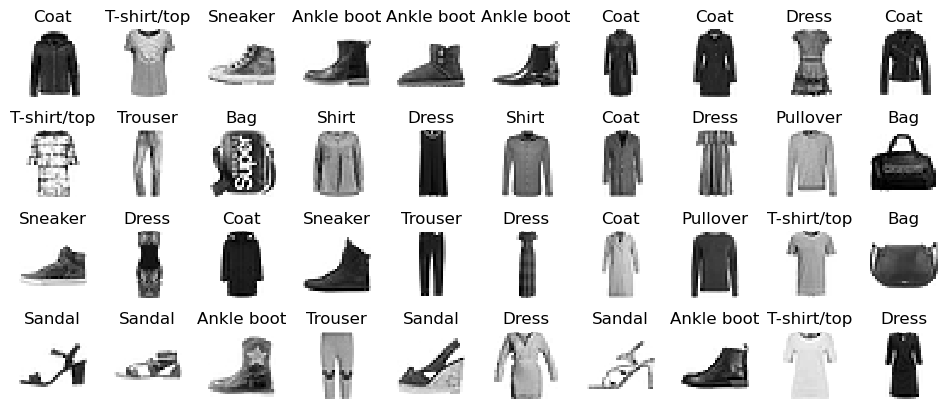

In [68]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [69]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

/opt/anaconda3/envs/deepLearningEnv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
hidden1 = model.layers[1]
hidden1.name

'dense_2'

In [73]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00591664,  0.05616134, -0.04889306, ..., -0.06466436,
        -0.02267102, -0.02688681],
       [-0.01546737, -0.01221338, -0.00935019, ...,  0.05124553,
        -0.05551155, -0.05598338],
       [-0.05760168, -0.07285602, -0.07312735, ..., -0.00533817,
         0.06423236,  0.02344587],
       ...,
       [ 0.02742427, -0.01734602, -0.0619428 , ...,  0.0504439 ,
        -0.03687045, -0.02180323],
       [-0.04597272,  0.03925983, -0.04187081, ..., -0.04014564,
         0.01330992,  0.01854207],
       [-0.02526568, -0.06332387,  0.05191533, ..., -0.04427791,
        -0.00252119,  0.03568072]], dtype=float32)

In [74]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [75]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.6767 - loss: 1.0003 - val_accuracy: 0.8198 - val_loss: 0.5275
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 937us/step - accuracy: 0.8235 - loss: 0.5035 - val_accuracy: 0.8410 - val_loss: 0.4579
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8422 - loss: 0.4485 - val_accuracy: 0.8538 - val_loss: 0.4237
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.8517 - loss: 0.4183 - val_accuracy: 0.8632 - val_loss: 0.4011
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8594 - loss: 0.3966 - val_accuracy: 0.8688 - val_loss: 0.3864
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 941us/step - accuracy: 0.8650 - loss: 0.3796 - val_accuracy: 0.8716 - val_loss: 0.3736
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 932us/step - accuracy: 0.8693 - loss: 0.3659 - val_accuracy: 0.8730 - val_loss: 0.3648
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.8735 - los

In [76]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

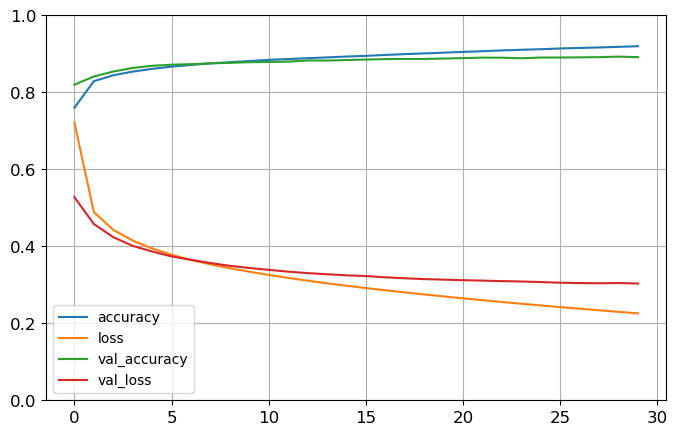

In [77]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [78]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.8792 - loss: 0.3473


[0.3456869125366211, 0.8787999749183655]

In [79]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [82]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred # Classes 9, 2 et 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([9, 2, 1])

In [83]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [84]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

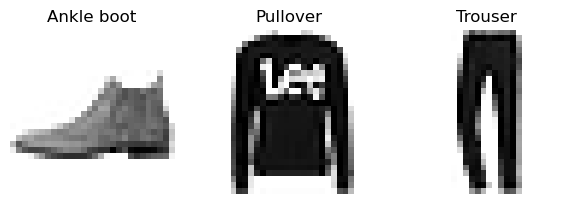

In [85]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()